<a href="https://colab.research.google.com/github/deesha74/Machine-Learning/blob/main/Data_Preprocessing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

Ignore the warnings

In [3]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# Rescaling data with MinMaxScaler

Create sample dataset to demonstrate minmaxscaling

In [4]:
df1 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [5]:
df1

,x1,x2,x3
0,8.938449,32.934455,49.604253
1,6.726100,38.828713,49.635460
2,10.298746,37.442936,48.356625
3,6.319418,27.583746,51.905090
4,8.905332,31.114752,47.493131
...,...,...,...
995,14.378458,29.222386,47.911698
996,4.288477,38.317152,48.933965
997,5.293525,33.877709,48.239805
998,8.015315,31.801576,46.086622


Use MinMaxScaler to apply minmaxscaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['x1', 'x2', 'x3'])

 Plot and visualize the results

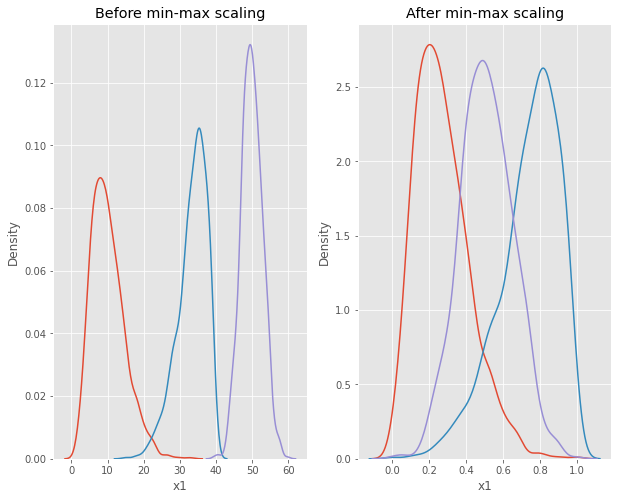

In [8]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before min-max scaling')
sns.kdeplot(df1['x1'], ax=ax1)
sns.kdeplot(df1['x2'], ax=ax1)
sns.kdeplot(df1['x3'], ax=ax1)

ax2.set_title('After min-max scaling')
sns.kdeplot(scaled_df1['x1'], ax=ax2)
sns.kdeplot(scaled_df1['x2'], ax=ax2)
sns.kdeplot(scaled_df1['x3'], ax=ax2)

plt.show()

**Interpretation**

We can see that the skewness of the distributions are maintained. But, now the three distributions are brought onto the same scale such that they overlap.

As with all the other transformers, we fit this transformer to the training data only, not to the full data set (including the test set). Only then we can use them to transform the training set and the test set and new data.

# Standardising data with StandardScaler

Create sample dataset to demonstrate standardization

In [10]:
np.random.seed(1)
df2 = pd.DataFrame({
            'x1':np.random.normal(0, 10, 10000),
            'x2':np.random.normal(10, 20, 10000),
            'x3':np.random.normal(-10, 10, 10000)
})

Use StandardScaler to apply Standardisation

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df2 = ss.fit_transform(df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns = ['x1', 'x2', 'x3'])

Plot and visualize the results

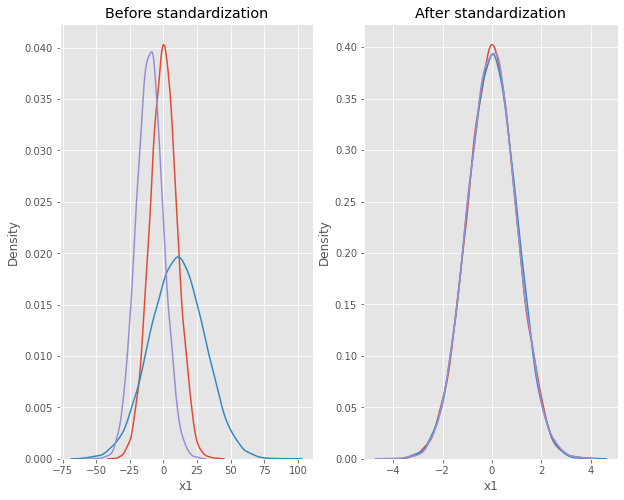

In [12]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)

plt.show()

**Interpretation**

As we can see, all the features are now on the same scale relative to one another.

We should fit the StandardScaler class only once on the training data set and use those parameters to transform the test set or new data set.

So, we can standardize the training dataset and use the same mean and standard deviation to standardize the test datase

# Rescaling data with MaxAbsScaler

Create sample dataset to demonstrate maxabsscaling

In [13]:
df3 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

Use MaxAbsScaler to apply maxabsscaling

In [14]:
from sklearn.preprocessing import MaxAbsScaler
mabs = MaxAbsScaler()
scaled_df3 = mabs.fit_transform(df3)
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x1', 'x2', 'x3'])

Plot and visualize the results

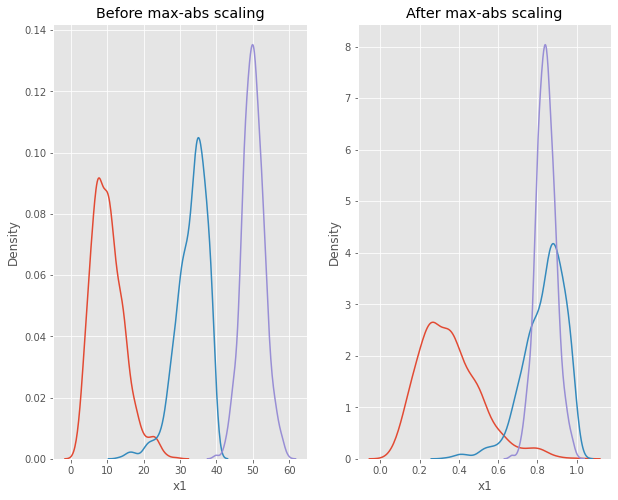

In [15]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before max-abs scaling')
sns.kdeplot(df3['x1'], ax=ax1)
sns.kdeplot(df3['x2'], ax=ax1)
sns.kdeplot(df3['x3'], ax=ax1)

ax2.set_title('After max-abs scaling')
sns.kdeplot(scaled_df3['x1'], ax=ax2)
sns.kdeplot(scaled_df3['x2'], ax=ax2)
sns.kdeplot(scaled_df3['x3'], ax=ax2)

plt.show()

**Interpretation**

MaxAbsScaler results in the feature variables being rescaled by their maximum absolute value.

# Rescaling using RobustScaler

Create sample dataset to demonstrate scaling using RobustScaler


In [17]:
df4 = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

Use RobustScaler for scaling

In [18]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
robust_scaled_df4 = rb.fit_transform(df4)
robust_scaled_df4 = pd.DataFrame(robust_scaled_df4, columns=['x1', 'x2'])

# Use MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
minmax_scaled_df4 = ms.fit_transform(df4)
minmax_scaled_df4 = pd.DataFrame(minmax_scaled_df4, columns=['x1', 'x2'])

Plot and visualize the results


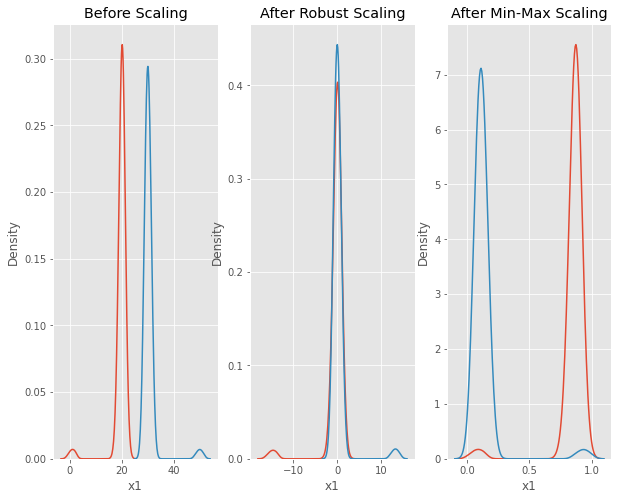

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df4['x1'], ax=ax1)
sns.kdeplot(df4['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df4['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df4['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df4['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df4['x2'], ax=ax3)

plt.show()

**Interpretation**

We can see that, RobustScaler transform the distributions to brought them onto the same scale.The distributions actually overlap each other. The outliers remain outside the range of the new distributions.

In MinMaxScaler, the two normal distributions are kept separate by the outliers that are inside the range of 0 and 1.

# Normalizing data with Normalizer

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
df5 = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [22]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
scaled_df5 = nm.fit_transform(df5)
scaled_df5 = pd.DataFrame(scaled_df5, columns= ['x1', 'y1', 'z1'])

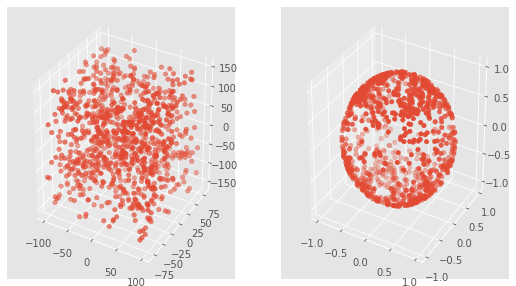

In [23]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df5['x1'], df5['y1'], df5['z1'])
ax2.scatter(scaled_df5['x1'], scaled_df5['y1'], scaled_df5['z1'])

plt.show()

# Binarizing data with Binarizer

Create sample dataset to demonstrate binarization 

In [26]:
data1 = [[2, -2, 1],
        [5, -5, 3],
        [1, 0, -1]]

df6 = pd.DataFrame(data1, columns = ['x1', 'x2', 'x3'])

Use Binarizer to apply binarization


In [27]:
from sklearn.preprocessing import Binarizer
binr = Binarizer(threshold=0.0, copy=False)
scaled_df6 = binr.fit_transform(df6)
scaled_df6 = pd.DataFrame(scaled_df6, columns = ['x1', 'x2', 'x3'])

 Print the results

In [28]:
scaled_df6

,x1,x2,x3
0,1,0,1
1,1,0,1
2,1,0,0


**Interpretation**

We can see that the dataframe df6 values are converted into binary values of 0 or 1 according to the threshold of 0.

# Mean removal with scale

Create sample dataset to demonstrate standardization using scale

In [31]:
data2 = [[5, -5, 1],
        [2, -2, 3],
        [1, 0, -1]]

df7 = pd.DataFrame(data2, columns = ['x4', 'x5', 'x6'])

 Use scale to apply standardization


In [32]:
from sklearn.preprocessing import scale
scaled_df7 = scale(df7)

Print the results


In [33]:
scaled_df7

array([[ 1.37281295, -1.29777137,  0.        ],
       [-0.39223227,  0.16222142,  1.22474487],
       [-0.98058068,  1.13554995, -1.22474487]])

**Interpretation**

The dataset is now standardized along axis = 0. So, the feature variables are now standardized independently.

The scaled data has zero mean

In [34]:
(scaled_df7.mean(axis = 0).astype(int))

array([0, 0, 0])

The scaled data has unit variance

In [35]:
(scaled_df7.std(axis = 0))

array([1., 1., 1.])

**Interpretation**

We can see that the scaled data has zero mean and unit variance.